## Accessing the project directory on my Google Drive

In [1]:
import os
from google.colab import drive

drive.mount('/drive', force_remount=False)

Mounted at /drive


In [2]:
project_dir = "/drive/My Drive/RNN_seq2seq"

# change working directory to project_dir
os.chdir(project_dir)

## Dependencies

In [3]:
import torch
from string import ascii_lowercase


from scripts.utils import read_json
from scripts.dataloader import get_text_encoder_decoder
from scripts.pytorch_utils import get_model, customize_predictor

In [4]:
in_vocab = ascii_lowercase
out_vocab = ascii_lowercase
in_seq_encoder, in_seq_decoder = get_text_encoder_decoder(in_vocab)
out_seq_encoder, out_seq_decoder = get_text_encoder_decoder(out_vocab)

criterion = torch.nn.CrossEntropyLoss()

## Loading saved model

In [5]:
def get_trained_model(task_name, rnn_type, attention, run_num=1):
    attention = "attn" if attention else "attn-less"
    saved_model_fp = f'experiments/{task_name}/{rnn_type}/{attention}/{run_num}/model.pt'
    ModelConfig = read_json(f'experiments/{task_name}/{rnn_type}/{attention}/{run_num}/ModelConfig.json')
    model = get_model(ModelConfig)
    model.load_state_dict(torch.load(saved_model_fp))
    return model

## Example: Identity

- Change the `task_name` according to the sub-folder name in the `experiments` folder to deploy the saved model for that task

In [6]:
task_name = "identity"
attention = True # True or False
run_num = 1 # 1, 2, or 3
srnn = get_trained_model(task_name, "SRNN", attention, run_num)
gru = get_trained_model(task_name, "GRU", attention, run_num)
lstm = get_trained_model(task_name, "LSTM", attention, run_num)

The model has 1,466,396 trainable parameters
The model has 3,305,500 trainable parameters
The model has 4,225,052 trainable parameters


In [7]:
test_text = ascii_lowercase[:10]

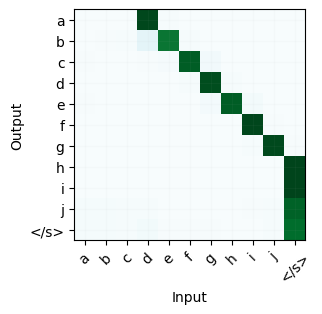

In [8]:
predictor_srnn = customize_predictor(srnn, in_seq_encoder, out_seq_decoder, max_output_len=200)
outputs_srnn, attn_weights_srnn = predictor_srnn(test_text)

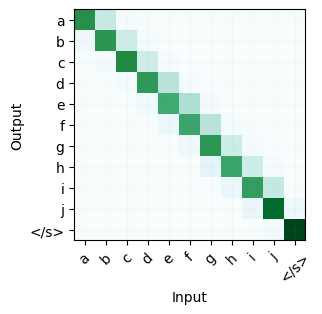

In [9]:
predictor_gru = customize_predictor(gru, in_seq_encoder, out_seq_decoder, max_output_len=200)
outputs_gru, attn_weights_gru = predictor_gru(test_text)

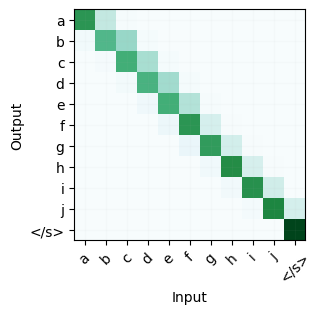

In [10]:
predictor_lstm = customize_predictor(lstm, in_seq_encoder, out_seq_decoder, max_output_len=200)
outputs_lstm, attn_weights_lstm = predictor_lstm(test_text)